In [1]:
import pickle

def write_obj(obj,filename):
    with open(filename, 'wb') as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as handle:
        b = pickle.load(handle)
        return b

book_data = load_obj("processed_arr2.pickle")

In [3]:
for book in book_data[0:5]:
    print book

{'streak': '12', 'owi': '435335', 'title': 'DESIREE', 'authors': ['Annemarie Selinko'], 'rank': '1', 'fast_subjects': set([u'D\xe9sir\xe9e, Queen, consort of Charles XIV John, King of Sweden and Norway, 1777-1860', 'Napoleon I, Emperor of the French, 1769-1821', 'English language', 'Relations with women']), 'year_pub': '1951', 'year': 1953, 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Female', 'viaf': '17229435', 'name': 'Annemarie Selinko'}]}
{'streak': '38', 'owi': '104466836', 'title': 'THE SILVER CHALICE', 'authors': ['Thomas B. Costain'], 'rank': '2', 'fast_subjects': set(['Historical fiction', 'Jesus Christ', 'Christian fiction', 'History of Biblical events', 'Grail', 'Bible.--New Testament', 'Last Supper']), 'year_pub': '1926', 'year': 1953, 'date': datetime.datetime(1953, 4, 19, 0, 0), 'genders': [{'gender': 'Male', 'viaf': '97749233', 'name': 'Thomas B. Costain'}]}
{'streak': '7', 'owi': '354027094', 'title': 'GOLDEN ADMIRAL', 'authors': ['Francis Van 

In [4]:
def is_book(x,book,fields):
    for f in fields:
        if x[f] != book[f]:
            return False
    return True

def find_book_in(book,ls,fields):
    for x in ls:
        if is_book(x,book,fields):
            return ls.index(x)
    return -1

def greater_than(book1,book2,f_to_max):
    try:
        f1 = int(book1[f_to_max])
        f2 = int(book2[f_to_max])
        if f_to_max == "rank":
            f1 = -f1
            f2 = -f2
        if f1>f2:
            return True
        else:
            return False
    except:
        return False

def get_unique_books_max(ls,u_fields,max_this):
    target =[]
    for book in ls:
        tar_index = find_book_in(book,target,u_fields)
        if tar_index>-1:
            tar_book = target[tar_index]
            if greater_than(book,tar_book,max_this):
                target[tar_index] = book
        else:
            target.append(book)
    return target
            


In [5]:
import random,pandas,matplotlib,re,math
%matplotlib inline

random.seed(0)
alph = re.compile('[^a-zA-Z]')
genre_terms = ["fiction","stories","tales","literature","opera"]
genre_dict = {"romance":{"keys":["romance","erotic"],"stops":["language"]}, #took out 'domestic'
              "domestic":{"keys":["domestic"]},
              "suspense":{"keys":["suspense"]},
              "legal":{"keys":["legal"]},
              "horror":{"keys":["horror","paranormal"]},
              "mystery":{"keys":["mystery","detective","crime"]},
              "spy_and_politics":{"keys":["spy ","politic"]},
              "fsf":{"keys":["fantasy","science fiction", "space","cyberpunk","steampunk"]},
              "adventure":{"keys":["adventure","western","sea "]},
              "ya":{"keys":["young adult"]},
              "war":{"keys":["war "]},
              "religious":{"keys":["religious","christian"],"stop":["aspects"]},
              "historical":{"keys":["historical"]} ## <-- I think this one might not be a well-supported
                                                   ## category in the DB
            }

def get_decade(year):
    frac = float(year)/10
    return math.floor(frac)*10

def strip_punct(text):
    return alph.sub('', text)

def norm_text(text):
    return strip_punct(text).lower()

def genre_candidate(fast_term):
    for term in genre_terms:
        if term in norm_text(fast_term):
            return True
    return False

def is_genre(fast_term,genre_str):
    terms = genre_dict[genre_str]['keys']
    if 'stops' in genre_dict[genre_str]:
        stops=genre_dict[genre_str]['stops']
    else:
        stops = []
    target = False
    for term in terms:
        if term in fast_term.lower():
            target = True
    for stop in stops:
        if stop in fast_term.lower():
            target = False
    return target


def class_gender(gender_ls):
    if len(gender_ls) == 1:
        return gender_ls[0]['gender']
    else:
        fem = 0
        male = 0
        for x in gender_ls:
            if x['gender'] == 'Female': ## THIS TREATS MIXED GENDER TEAMS AS FEMALE
                fem = fem+1
                male = male+1
            else:
                if x['gender'] == 'Male':
                    male = male+1
        if fem+male == 0:
            return 'NA'
        ratio = float(fem)/float(fem+male)
        if ratio == 1:
            return 'Female'
        if ratio == 0:
            return 'Male'
        return 'Both'

def new_class_genre(subject_ls):
    target = []
    for sub in subject_ls:
        if genre_candidate(sub):
            for genre in genre_dict:
                if is_genre(sub,genre):
                    target.append(genre)
    if len(target) > 1:
        return random.choice(target)
    if len(subject_ls)>0:
        return "zz_no genre"
    else:
        return "zz_needs label"
        
def prep_dataframe(df):
    df = df.drop_duplicates(["title","year"])
    df.loc[:,"genre"] = df["fast_subjects"].apply(new_class_genre)
    df.loc[:,"gender"] = df["genders"].apply(class_gender)
    return df

In [6]:
max_ranks = get_unique_books_max(book_data,["title","authors"],"rank")

gender                Both    Female      Male        NA
rank                                                    
1       0.022942  0.018893  0.333333  0.607287  0.017544
2       0.021930  0.006579  0.368421  0.581140  0.021930
3       0.024283  0.011038  0.373068  0.560706  0.030905
4       0.022173  0.004435  0.354767  0.589800  0.028825
5       0.016216  0.008108  0.408108  0.540541  0.027027
6       0.024064  0.002674  0.342246  0.601604  0.029412
7       0.033592  0.007752  0.330749  0.594315  0.033592
8       0.032070  0.017493  0.376093  0.551020  0.023324
9       0.045584  0.014245  0.393162  0.529915  0.017094
10      0.030769  0.012308  0.403077  0.510769  0.043077
11      0.043956  0.007326  0.340659  0.589744  0.018315
12      0.037313  0.011194  0.395522  0.526119  0.029851
13      0.037801       NaN  0.350515  0.560137  0.051546
14      0.058333  0.016667  0.370833  0.529167  0.025000
15      0.115108  0.014388  0.244604  0.589928  0.035971
16      0.219512       NaN  0.2

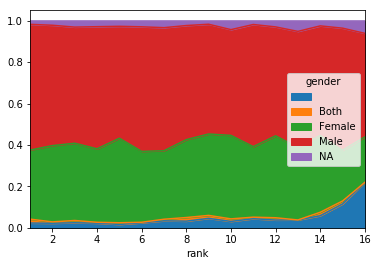

In [36]:
def count_to_percent(value,group,totals):
    s = totals.loc[group]["sum"]
    return float(value)/float(s)

rank_df = pandas.DataFrame(max_ranks)
ndf = prep_dataframe(rank_df)
ndf.loc[:,"rank"] = pandas.to_numeric(ndf["rank"], errors='coerce')
ndf = ndf[ndf["rank"]!=0]
ndf.loc[:,"decade"] = ndf["year"].apply(get_decade)
rank_gender = pandas.DataFrame({'count' : ndf.groupby( ["rank", "gender"] ).size()}).reset_index()

rank_totals = pandas.DataFrame({'sum' : ndf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]

rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
print rank_gender
rank_gender.plot(kind="area")


In [47]:
def graph_gender_ratio_rank(odf,dec):
    odf = pandas.concat([(odf[odf["gender"] == "Male"]), (odf[odf["gender"] == "Female"])])
    rank_gender = pandas.DataFrame({'count' : odf.groupby( ["rank", "gender"] ).size()}).reset_index()
    rank_totals = pandas.DataFrame({'sum' : odf.groupby("rank").size()})
#rank_totals
#print rank_totals.loc[3]["sum"]
    rank_gender.loc[:,"percent"] = rank_gender.apply(lambda x: count_to_percent(x['count'], x['rank'],rank_totals), axis=1)
    rank_gender = rank_gender.pivot(index='rank', columns='gender', values='percent')
    ax = rank_gender["Female"].plot(kind = "area")
    ax.set_title(str(dec)+'s')
    return ax


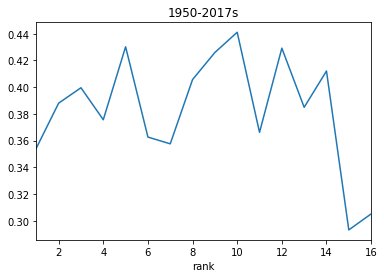

In [44]:
fig = graph_gender_ratio_rank(ndf,"1950-2017").get_figure()
fig.savefig("proportion_of_women_by_rank.png")

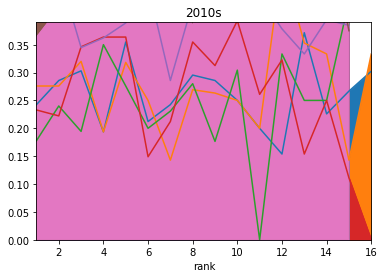

In [48]:
decades =[1950,1960,1970,1980,1990,2000,2010]
for decade in decades:
    #print decade
    decade_frame = ndf[ndf["decade"]==decade]
    ax = graph_gender_ratio_rank(decade_frame,decade)

In [26]:
max_streaks = get_unique_books_max(book_data,["title","authors"],"streak")

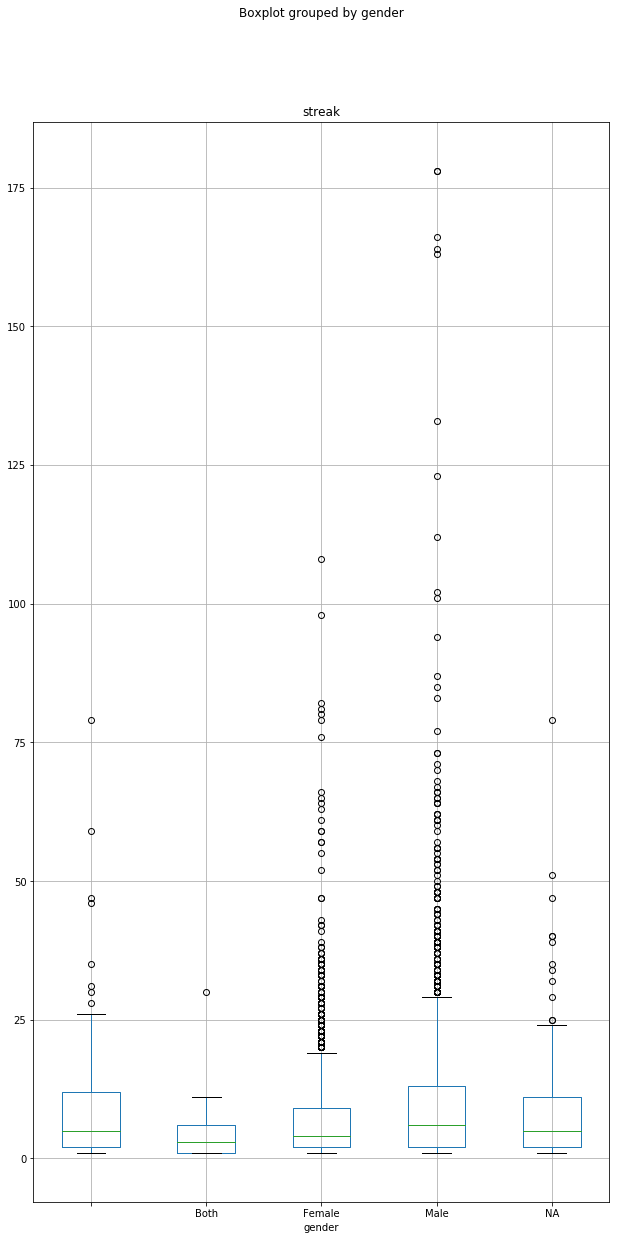

In [33]:
streak_df = pandas.DataFrame(max_streaks)
ndf = prep_dataframe(streak_df)
ndf.loc[:,"streak"] = pandas.to_numeric(ndf["streak"], errors='coerce')
fig = ndf.boxplot(column="streak",by="gender",figsize = (10,20)).get_figure()
fig.savefig("boxplot_streaks.png")
#ndf = ndf[ndf["streak"]>10]

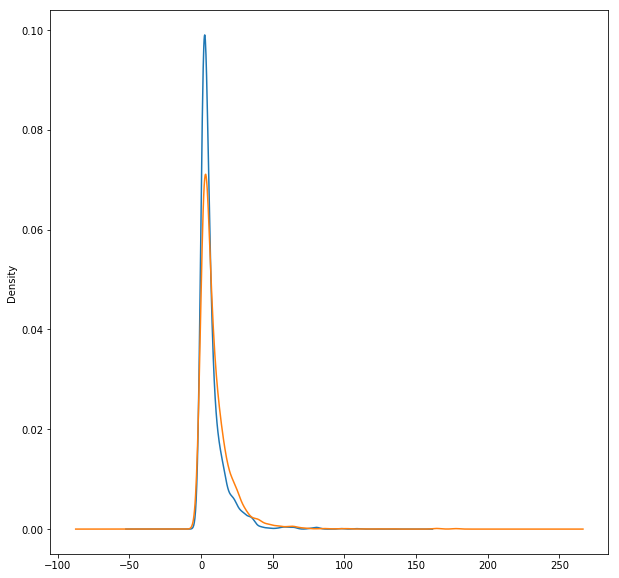

In [34]:
female = ndf[ndf["gender"]=="Female"]
male = ndf[ndf["gender"]=="Male"]
ax = female["streak"].plot.density(figsize=(10,10))
fig = male["streak"].plot.density(ax=ax).get_figure()
fig.savefig("streak_density.png")